# Capstone Project - The Battle of Neighborhoods

## 1. A description of the problem and a discussion of the background. (15 marks)

The first known Chinese restaurant in America, Canton Restaurant, opened in San Francisco in 1849. Today, the cuisine (though much of it bears little resemblance to any dishes you'd find in China) has become a favorite throughout the country, with nearly 50,000 Chinese restaurants across the U.S.

It originally arrived with the flood of Chinese immigrants to California in the mid-nineteenth century—mostly from Canton province—drawn by the Gold Rush and fleeing economic problems and famine in China. By 1880, there more than 100,000 Chinese people living in the U.S; restaurants had begun to crop up to feed the growing population of workers, missing the flavors of home. Of course, the dishes had to be modified to use ingredients that were available in the U.S. to replace those found only in China; they also were tweaked to make them more familiar to American palates. Soon, America faced its own economic downturn, in the 1870s. White workers felt threatened by Chinese laborers, who would work for less money. As a result, the Chinese Exclusion Act, a law forbidding Chinese immigration, was passed in 1882.

An exception was available to a few select groups; starting in 1915, merchants, including high-end restaurateurs, could apply—and many did, exploiting the exception. According to the exhibit, the number of Chinese restaurants in New York City alone quadrupled between 1910 and 1920. Well before that, however, late-1800s versions of hipsters were heading into the city's Chinatown to seek new flavors to satisfy their adventurous palates. They discovered the novel flavors of Americanized Chinese dishes like chop suey and egg foo young, popularizing them to the point that they spread throughout the city. "By 1903," the exhibit says, "over 100 chop suey houses existed between 14th and 45th Streets, from the Bowery to Eighth Avenue." It spread across the nation, reaching a peak in the 1920s and '30s. Meanwhile, the restaurants also went upscale. That merchant visa available to Chinese restaurateurs? It was only for "high grade" restaurants, so the ones that opened featured high-end finishes and gilded carvings; going out for Chinese became a luxury experience.

The Chinese Exclusion Act was repealed in 1943. By that time, the cuisine had entered the mainstream and Chinese restaurants had become ubiquitous. Increased prosperity allowed Americans to dine out more often, and authenticity came into vogue. Classic Americanized dishes like chop suey were abandoned in favor of more-authentic regional Chinese dishes like General Tso's Chicken, invented by a Hunanese chef in the 1950s and brought to the U.S. soon after. Today, the dish is the most-ordered Chinese dish on grubhub.com and the fourth most-popular dish on the website.

In this project, we want to examine a good location to open a Chinese restaurant in New York City, which has a strong Chinese demographic.

## 2. A description of the data and how it will be used to solve the problem. (15 marks)

To find the best location to open a Chinese restaurant, I will use New York City data that contains the latitude and longitude of all Chinese restaurants in Manhattan. The data is public available: https://cocl.us/new_york_dataset.
To have more information on each Chinese restaurants, I will use the Foursquare API.

Firstly, the New York City data will be downloaded, which including neighborhood names and geo data. The latitude and longtitude can be used to create the map later.

Then I will use Foursquare API to query the Chinese restaurant information for each of the neighborhood. The popularity and the rating of the Chinease restaurants in every neighborhood will be analysed.

Finally I will try to conclude which is the best location to open a new Chinese restaurant based on the data on hand.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [3]:
def get_venues(lat,lng):
    
    #set variables
    CLIENT_ID='RVWNH1W2P0XJ5LJF2AZVE5YVRRB1DLQWNEXPKOS32TKI0AP2'
    CLIENT_SECRET='5OXBK2ZDJZIX1IQNMLXSZ1MNZHXUPGH3R23HWAEEP3WNCDDF'
    VERSION = '20180323'
    LIMIT = 100
    radius = 500    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [32]:
def get_venue_details(venue_id):
        
    CLIENT_ID='RVWNH1W2P0XJ5LJF2AZVE5YVRRB1DLQWNEXPKOS32TKI0AP2'
    CLIENT_SECRET='5OXBK2ZDJZIX1IQNMLXSZ1MNZHXUPGH3R23HWAEEP3WNCDDF'
    VERSION = '20180323'
#     CLIENT_ID = 'EB414E55S3IE2W0NPP51WEPSSMRJ4IUQHZKNPS0FHK24FLGH' # your Foursquare ID
#     CLIENT_SECRET = '1G0OLXMNIDQSEZZL1VPL00TI1BJ1W25YF3W1EO3GMLR5VSKY' # your Foursquare Secret
#     VERSION = '20190327' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    # print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [12]:
new_york_data=get_new_york_data()

In [3]:
new_york_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [11]:
new_york_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Borough         306 non-null object
Neighborhood    306 non-null object
Latitude        306 non-null float64
Longitude       306 non-null float64
dtypes: float64(2), object(2)
memory usage: 9.6+ KB


In [12]:
new_york_data.to_csv("new_york.csv")

In [62]:
new_york_data = pd.read_csv('new_york.csv', index_col=0)

In [7]:
new_york_data['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [16]:
bronx_data = new_york_data[new_york_data.Borough == 'Bronx']
manhattan_data = new_york_data[new_york_data.Borough == 'Manhattan']
brooklyn_data = new_york_data[new_york_data.Borough == 'Brooklyn']
queens_data = new_york_data[new_york_data.Borough == 'Queens']
staten_island_data = new_york_data[new_york_data.Borough == 'Staten Island']

In [14]:
def get_rest_name(df):
    chinese_rest=pd.DataFrame(columns=column_names)
    count=1
    for row in df.values.tolist():
        Borough, Neighborhood, Latitude, Longitude=row
        venues = get_venues(Latitude,Longitude)
        chinese_resturants=venues[venues['Category']=='Chinese Restaurant'] 
        print('(',count,'/',len(df),')','Chinese Restaurant in '+Neighborhood+', '+Borough+':'+str(len(chinese_resturants)))
        for resturant_detail in chinese_resturants.values.tolist():
            id, name , category=resturant_detail
            chinese_rest = chinese_rest.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood, 
                                                    'ID': id,
                                                    'Name' : name
                                                   }, ignore_index=True)
        count+=1
    return chinese_rest

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_rest_manhattan = get_rest_name(manhattan_data)

( 1 / 40 ) Chinese Restaurant in Marble Hill, Manhattan:0
( 2 / 40 ) Chinese Restaurant in Chinatown, Manhattan:8
( 3 / 40 ) Chinese Restaurant in Washington Heights, Manhattan:2
( 4 / 40 ) Chinese Restaurant in Inwood, Manhattan:2
( 5 / 40 ) Chinese Restaurant in Hamilton Heights, Manhattan:2
( 6 / 40 ) Chinese Restaurant in Manhattanville, Manhattan:1
( 7 / 40 ) Chinese Restaurant in Central Harlem, Manhattan:2
( 8 / 40 ) Chinese Restaurant in East Harlem, Manhattan:0
( 9 / 40 ) Chinese Restaurant in Upper East Side, Manhattan:1
( 10 / 40 ) Chinese Restaurant in Yorkville, Manhattan:1
( 11 / 40 ) Chinese Restaurant in Lenox Hill, Manhattan:1
( 12 / 40 ) Chinese Restaurant in Roosevelt Island, Manhattan:0
( 13 / 40 ) Chinese Restaurant in Upper West Side, Manhattan:1
( 14 / 40 ) Chinese Restaurant in Lincoln Square, Manhattan:0
( 15 / 40 ) Chinese Restaurant in Clinton, Manhattan:1
( 16 / 40 ) Chinese Restaurant in Midtown, Manhattan:1
( 17 / 40 ) Chinese Restaurant in Murray Hill, Ma

In [18]:
# chinese_rest_manhattan.to_csv('chinese_rest_manhattan.csv')

In [16]:
chinese_rest_brooklyn = get_rest_name(brooklyn_data)

( 1 / 70 ) Chinese Restaurant in Bay Ridge, Brooklyn:2
( 2 / 70 ) Chinese Restaurant in Bensonhurst, Brooklyn:5
( 3 / 70 ) Chinese Restaurant in Sunset Park, Brooklyn:0
( 4 / 70 ) Chinese Restaurant in Greenpoint, Brooklyn:0
( 5 / 70 ) Chinese Restaurant in Gravesend, Brooklyn:2
( 6 / 70 ) Chinese Restaurant in Brighton Beach, Brooklyn:0
( 7 / 70 ) Chinese Restaurant in Sheepshead Bay, Brooklyn:0
( 8 / 70 ) Chinese Restaurant in Manhattan Terrace, Brooklyn:0
( 9 / 70 ) Chinese Restaurant in Flatbush, Brooklyn:1
( 10 / 70 ) Chinese Restaurant in Crown Heights, Brooklyn:0
( 11 / 70 ) Chinese Restaurant in East Flatbush, Brooklyn:1
( 12 / 70 ) Chinese Restaurant in Kensington, Brooklyn:0
( 13 / 70 ) Chinese Restaurant in Windsor Terrace, Brooklyn:1
( 14 / 70 ) Chinese Restaurant in Prospect Heights, Brooklyn:0
( 15 / 70 ) Chinese Restaurant in Brownsville, Brooklyn:0
( 16 / 70 ) Chinese Restaurant in Williamsburg, Brooklyn:0
( 17 / 70 ) Chinese Restaurant in Bushwick, Brooklyn:0
( 18 / 70

In [19]:
# chinese_rest_brooklyn.to_csv('chinese_rest_brooklyn.csv')

In [20]:
chinese_rest_bronx = get_rest_name(bronx_data)

( 1 / 52 ) Chinese Restaurant in Wakefield, Bronx:0
( 2 / 52 ) Chinese Restaurant in Co-op City, Bronx:1
( 3 / 52 ) Chinese Restaurant in Eastchester, Bronx:1
( 4 / 52 ) Chinese Restaurant in Fieldston, Bronx:0
( 5 / 52 ) Chinese Restaurant in Riverdale, Bronx:0
( 6 / 52 ) Chinese Restaurant in Kingsbridge, Bronx:1
( 7 / 52 ) Chinese Restaurant in Woodlawn, Bronx:0
( 8 / 52 ) Chinese Restaurant in Norwood, Bronx:2
( 9 / 52 ) Chinese Restaurant in Williamsbridge, Bronx:0
( 10 / 52 ) Chinese Restaurant in Baychester, Bronx:0
( 11 / 52 ) Chinese Restaurant in Pelham Parkway, Bronx:1
( 12 / 52 ) Chinese Restaurant in City Island, Bronx:0
( 13 / 52 ) Chinese Restaurant in Bedford Park, Bronx:2
( 14 / 52 ) Chinese Restaurant in University Heights, Bronx:1
( 15 / 52 ) Chinese Restaurant in Morris Heights, Bronx:1
( 16 / 52 ) Chinese Restaurant in Fordham, Bronx:2
( 17 / 52 ) Chinese Restaurant in East Tremont, Bronx:0
( 18 / 52 ) Chinese Restaurant in West Farms, Bronx:1
( 19 / 52 ) Chinese R

In [22]:
# chinese_rest_bronx.to_csv('chinese_rest_bronx.csv')

In [23]:
chinese_rest_queens = get_rest_name(queens_data)

( 1 / 81 ) Chinese Restaurant in Astoria, Queens:2
( 2 / 81 ) Chinese Restaurant in Woodside, Queens:2
( 3 / 81 ) Chinese Restaurant in Jackson Heights, Queens:0
( 4 / 81 ) Chinese Restaurant in Elmhurst, Queens:3
( 5 / 81 ) Chinese Restaurant in Howard Beach, Queens:1
( 6 / 81 ) Chinese Restaurant in Corona, Queens:0
( 7 / 81 ) Chinese Restaurant in Forest Hills, Queens:1
( 8 / 81 ) Chinese Restaurant in Kew Gardens, Queens:4
( 9 / 81 ) Chinese Restaurant in Richmond Hill, Queens:1
( 10 / 81 ) Chinese Restaurant in Flushing, Queens:5
( 11 / 81 ) Chinese Restaurant in Long Island City, Queens:2
( 12 / 81 ) Chinese Restaurant in Sunnyside, Queens:3
( 13 / 81 ) Chinese Restaurant in East Elmhurst, Queens:0
( 14 / 81 ) Chinese Restaurant in Maspeth, Queens:1
( 15 / 81 ) Chinese Restaurant in Ridgewood, Queens:0
( 16 / 81 ) Chinese Restaurant in Glendale, Queens:0
( 17 / 81 ) Chinese Restaurant in Rego Park, Queens:2
( 18 / 81 ) Chinese Restaurant in Woodhaven, Queens:0
( 19 / 81 ) Chinese

In [25]:
# chinese_rest_queens.to_csv('chinese_rest_queens.csv')

In [26]:
chinese_rest_staten_island = get_rest_name(staten_island_data)

( 1 / 63 ) Chinese Restaurant in St. George, Staten Island:0
( 2 / 63 ) Chinese Restaurant in New Brighton, Staten Island:0
( 3 / 63 ) Chinese Restaurant in Stapleton, Staten Island:1
( 4 / 63 ) Chinese Restaurant in Rosebank, Staten Island:0
( 5 / 63 ) Chinese Restaurant in West Brighton, Staten Island:1
( 6 / 63 ) Chinese Restaurant in Grymes Hill, Staten Island:0
( 7 / 63 ) Chinese Restaurant in Todt Hill, Staten Island:0
( 8 / 63 ) Chinese Restaurant in South Beach, Staten Island:0
( 9 / 63 ) Chinese Restaurant in Port Richmond, Staten Island:0
( 10 / 63 ) Chinese Restaurant in Mariner's Harbor, Staten Island:0
( 11 / 63 ) Chinese Restaurant in Port Ivory, Staten Island:0
( 12 / 63 ) Chinese Restaurant in Castleton Corners, Staten Island:0
( 13 / 63 ) Chinese Restaurant in New Springville, Staten Island:2
( 14 / 63 ) Chinese Restaurant in Travis, Staten Island:0
( 15 / 63 ) Chinese Restaurant in New Dorp, Staten Island:1
( 16 / 63 ) Chinese Restaurant in Oakwood, Staten Island:0
( 

In [28]:
# chinese_rest_staten_island.to_csv('chinese_rest_staten_island.csv')

In [29]:
# combine all restaurant names in one dataframe
chinese_rest_ny = pd.concat([chinese_rest_manhattan,chinese_rest_bronx,
                             chinese_rest_brooklyn,chinese_rest_queens,
                             chinese_rest_staten_island],ignore_index=True) 

In [30]:
chinese_rest_ny

,Borough,Neighborhood,ID,Name
0,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village
1,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods
2,Manhattan,Chinatown,4a96bf8ff964a520ce2620e3,Wah Fung Number 1 Fast Food 華豐快飯店
3,Manhattan,Chinatown,3fd66200f964a52067e61ee3,Joe's Shanghai 鹿嗚春
4,Manhattan,Chinatown,3fd66200f964a520b1ea1ee3,Great N.Y. Noodletown
5,Manhattan,Chinatown,5c965dad5455b2002c058659,Yi Ji Shi Mo Noodle Corp
6,Manhattan,Chinatown,3fd66200f964a520ede41ee3,Big Wong King 大旺
7,Manhattan,Chinatown,59ad625a2619ee5cdded881f,House Special 甘來飯店
8,Manhattan,Washington Heights,4b292f38f964a520939a24e3,Yang Garden
9,Manhattan,Washington Heights,4b3fe94af964a520e2b125e3,No. 1 Chinese Restaurant


In [5]:
chinese_rest_ny.to_csv('chinese_rest_ny.csv')

NameError: name 'chinese_rest_ny' is not defined

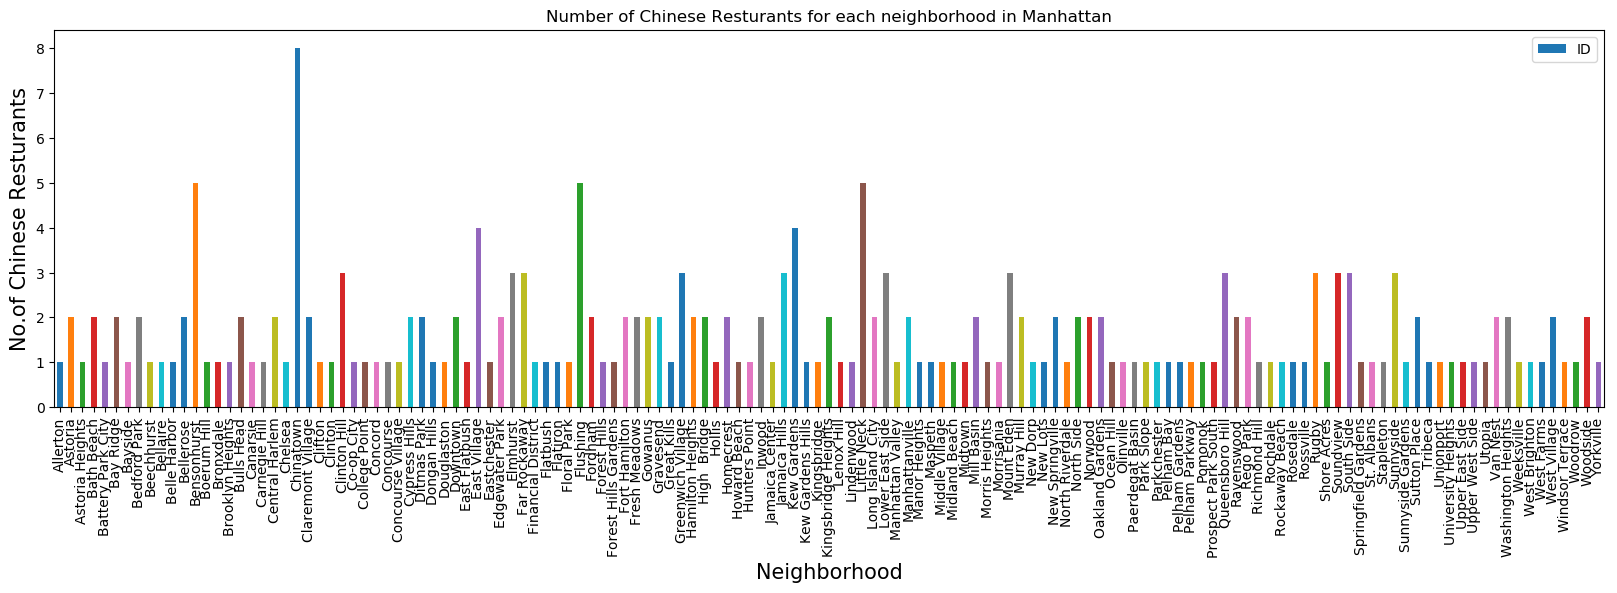

In [33]:
plt.figure(figsize=(20,5), dpi = 100)
# title
plt.title('Number of Chinese Resturants for each neighborhood in Manhattan')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Resturants', fontsize=15)
#giving a bar plot
chinese_rest_ny.groupby('Neighborhood')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [5]:
def get_rest_stats(df):
    column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
    chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
    count=1
    for row in df.values.tolist():
        Borough,Neighborhood,ID,Name=row
        try:
            venue_details=get_venue_details(ID)
            print(venue_details)
            id,name,likes,rating,tips=venue_details.values.tolist()[0]
        except IndexError:
            print('No data available for id=',ID)
            id,name,likes,rating,tips=[0]*5
        print('(',count,'/',len(df),')','processed')
        chinese_rest_stats_ny = chinese_rest_stats_ny.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood, 
                                                    'ID': id,
                                                    'Name' : name,
                                                    'Likes' : likes,
                                                    'Rating' : rating,
                                                    'Tips' : tips
                                                   }, ignore_index=True)
        count+=1
    return chinese_rest_stats_ny

In [52]:
chinese_rest_ny = pd.read_csv('chinese_rest_ny.csv', index_col = 0)

In [7]:
manhattan_stats = get_rest_stats(chinese_rest_ny[chinese_rest_ny.Borough == 'Manhattan'])

                         ID           Name  Likes  Rating  Tips
0  4db3374590a0843f295fb69b  Spicy Village    493     8.7   177
( 1 / 47 ) processed
                         ID                Name  Likes  Rating  Tips
0  5894c9a15e56b417cf79e553  Xi'an Famous Foods     97     8.9    27
( 2 / 47 ) processed
                         ID                               Name  Likes  Rating  \
0  4a96bf8ff964a520ce2620e3  Wah Fung Number 1 Fast Food 華豐快飯店    181     8.3   

   Tips  
0    91  
( 3 / 47 ) processed
                         ID                Name  Likes  Rating  Tips
0  3fd66200f964a52067e61ee3  Joe's Shanghai 鹿嗚春   1296     8.5   566
( 4 / 47 ) processed
                         ID                   Name  Likes  Rating  Tips
0  3fd66200f964a520b1ea1ee3  Great N.Y. Noodletown    535     8.0   285
( 5 / 47 ) processed
                         ID                      Name  Likes  Rating  Tips
0  5c965dad5455b2002c058659  Yi Ji Shi Mo Noodle Corp     13     8.2     2
( 6 / 47 ) pro

In [9]:
manhattan_stats.to_csv('manhattan_stats.csv')

In [12]:
bronx_stats = get_rest_stats(chinese_rest_ny[chinese_rest_ny.Borough == 'Bronx'])

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c9d5f2654c8a1cd2e71834b
( 1 / 40 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4dabc3dc93a04642f09ccabd
( 2 / 40 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e3b11c98877b00cfc27a483
( 3 / 40 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e388d77887777123dca9cab
( 4 / 40 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e41d2c4b61ca5ba3b1f9c6b
( 5 / 40 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4b9d6b45f964a52078ab36e3  Mr. Q's Chinese Restaurant      9     7.5    10
( 6 / 40 ) processed
                         ID                          Name  Likes  Rating  Tips
0  4e4d0387bd413c4cc66dfd72  Hung Hing Chinese Rest

In [14]:
bronx_stats.to_csv('bronx_stats.csv')

In [18]:
brooklyn_stats = get_rest_stats(chinese_rest_ny[chinese_rest_ny.Borough == 'Brooklyn'])

                         ID Name  Likes  Rating  Tips
0  5553702c498ecb85f99d8f37  XIN      6     7.1     4
( 1 / 48 ) processed
                         ID        Name  Likes  Rating  Tips
0  4a5beec3f964a52006bc1fe3  86 Noodles     19     7.7    22
( 2 / 48 ) processed
                         ID                Name  Likes  Rating  Tips
0  4c156911a1010f4752094e18  Dai Wah Yummy City      8     6.4     4
( 3 / 48 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e4cd93fbd413c4cc66ca721
( 4 / 48 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c2169947e85c928b88aba21
( 5 / 48 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4be5aed3d4f7c9b692be2520
( 6 / 48 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4cb9d2524c60a0931c2f42ca
( 7 / 48 ) processed
Empty DataFra

In [19]:
brooklyn_stats.to_csv('brooklyn_stats.csv')

In [31]:
# since only 50 rows of data can be downloaded daily, Queens data is splitted
queens_stats_1 = get_rest_stats(chinese_rest_ny[chinese_rest_ny.Borough == 'Queens'][0:50])

                         ID                             Name  Likes  Rating  \
0  4aa9b377f964a520f15420e3  Golden House Chinese Restaurant      3     7.4   

   Tips  
0     6  
( 1 / 50 ) processed
                         ID    Name  Likes  Rating  Tips
0  4bbc15b3ed7776b0b5563f51  Sampan      7     7.5     4
( 2 / 50 ) processed
                         ID                Name  Likes  Rating  Tips
0  4ae1d8b2f964a520e78721e3  Peking BBQ Chicken     47     8.2    26
( 3 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c60846512e5c928dd6e1f4c
( 4 / 50 ) processed
                         ID                        Name  Likes  Rating  Tips
0  56296f14498edb1ed77b64a3  Five Loaves and Two Fishes     10     8.3     1
( 5 / 50 ) processed
                         ID          Name  Likes  Rating  Tips
0  4eaf0752d3e30d448393b841  Lao Bei Fang     80     8.3    49
( 6 / 50 ) processed
                         ID                  

In [33]:
queens_stats_2 = get_rest_stats(chinese_rest_ny[chinese_rest_ny.Borough == 'Queens'][50:])

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e4e41e9bd4101d0d7a620eb
( 1 / 22 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4bf987b15efe2d7fcc646c34
( 2 / 22 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4d69549ede28224b0ac241be
( 3 / 22 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c801dd02f1c236ab8c62343
( 4 / 22 ) processed
                         ID                                Name  Likes  \
0  4ac90140f964a520f7bd20e3  Main Street Taiwanese Gourmet 北港台菜     62   

   Rating  Tips  
0     7.9    28  
( 5 / 22 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4f844c6fe4b0059705cb042c  Lake Pavilion Restaurant    116     7.0    42
( 6 / 22 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c5

In [35]:
# now we combine the data into one dataframe
queens_stats = pd.concat([queens_stats_1, queens_stats_2], ignore_index=True)
queens_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
Borough         72 non-null object
Neighborhood    72 non-null object
ID              72 non-null object
Name            72 non-null object
Likes           72 non-null object
Rating          72 non-null object
Tips            72 non-null object
dtypes: object(7)
memory usage: 4.0+ KB


In [37]:
queens_stats.to_csv('queens_stats.csv')

In [38]:
staten_stats = get_rest_stats(chinese_rest_ny[chinese_rest_ny.Borough == 'Staten Island'])

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4f32043a19833175d60a05a4
( 1 / 16 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4d8a72396daeb60cd8f064e0
( 2 / 16 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4ba16a96f964a5200ab537e3
( 3 / 16 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c858222d34ca1430e524880
( 4 / 16 ) processed
                         ID          Name  Likes  Rating  Tips
0  4c14210c7f7f2d7fae69e068  Crown Palace      9     5.8     5
( 5 / 16 ) processed
                         ID                              Name  Likes  Rating  \
0  4b747adcf964a52010df2de3  Lucky Fortune Chinese Restaurant      8     6.5   

   Tips  
0     6  
( 6 / 16 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4d

In [39]:
staten_stats.to_csv('staten_stats.csv')

In [40]:
staten_stats

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Staten Island,Stapleton,0,0,0,0,0
1,Staten Island,West Brighton,0,0,0,0,0
2,Staten Island,New Springville,0,0,0,0,0
3,Staten Island,New Springville,0,0,0,0,0
4,Staten Island,New Dorp,4c14210c7f7f2d7fae69e068,Crown Palace,9,5.8,5
5,Staten Island,Great Kills,4b747adcf964a52010df2de3,Lucky Fortune Chinese Restaurant,8,6.5,6
6,Staten Island,Woodrow,0,0,0,0,0
7,Staten Island,Dongan Hills,4bba73677421a593ebd4c340,Jac Mao,23,7.9,12
8,Staten Island,Midland Beach,0,0,0,0,0
9,Staten Island,Rossville,0,0,0,0,0


In [41]:
# combine all stats data
ny_stats = pd.concat([manhattan_stats,bronx_stats,
                             brooklyn_stats,queens_stats,
                             staten_stats],ignore_index=True) 

In [42]:
ny_stats.head(20)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village,493,8.7,177
1,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods,97,8.9,27
2,Manhattan,Chinatown,4a96bf8ff964a520ce2620e3,Wah Fung Number 1 Fast Food 華豐快飯店,181,8.3,91
3,Manhattan,Chinatown,3fd66200f964a52067e61ee3,Joe's Shanghai 鹿嗚春,1296,8.5,566
4,Manhattan,Chinatown,3fd66200f964a520b1ea1ee3,Great N.Y. Noodletown,535,8,285
5,Manhattan,Chinatown,5c965dad5455b2002c058659,Yi Ji Shi Mo Noodle Corp,13,8.2,2
6,Manhattan,Chinatown,3fd66200f964a520ede41ee3,Big Wong King 大旺,414,8.3,185
7,Manhattan,Chinatown,59ad625a2619ee5cdded881f,House Special 甘來飯店,21,8.1,13
8,Manhattan,Washington Heights,4b292f38f964a520939a24e3,Yang Garden,6,7.7,2
9,Manhattan,Washington Heights,4b3fe94af964a520e2b125e3,No. 1 Chinese Restaurant,3,6.7,5


In [45]:
# delete rows with invalid data
ny_stats_filtered = ny_stats[ny_stats['ID']!=0]

In [47]:
ny_stats_filtered.head(30)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village,493,8.7,177
1,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods,97,8.9,27
2,Manhattan,Chinatown,4a96bf8ff964a520ce2620e3,Wah Fung Number 1 Fast Food 華豐快飯店,181,8.3,91
3,Manhattan,Chinatown,3fd66200f964a52067e61ee3,Joe's Shanghai 鹿嗚春,1296,8.5,566
4,Manhattan,Chinatown,3fd66200f964a520b1ea1ee3,Great N.Y. Noodletown,535,8,285
5,Manhattan,Chinatown,5c965dad5455b2002c058659,Yi Ji Shi Mo Noodle Corp,13,8.2,2
6,Manhattan,Chinatown,3fd66200f964a520ede41ee3,Big Wong King 大旺,414,8.3,185
7,Manhattan,Chinatown,59ad625a2619ee5cdded881f,House Special 甘來飯店,21,8.1,13
8,Manhattan,Washington Heights,4b292f38f964a520939a24e3,Yang Garden,6,7.7,2
9,Manhattan,Washington Heights,4b3fe94af964a520e2b125e3,No. 1 Chinese Restaurant,3,6.7,5


In [49]:
ny_stats_filtered[['Likes', 'Rating', 'Tips']] = ny_stats_filtered[['Likes', 'Rating', 'Tips']].astype(float)

d:\python\miniconda\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [50]:
ny_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 222
Data columns (total 7 columns):
Borough         128 non-null object
Neighborhood    128 non-null object
ID              128 non-null object
Name            128 non-null object
Likes           128 non-null float64
Rating          128 non-null float64
Tips            128 non-null float64
dtypes: float64(3), object(4)
memory usage: 8.0+ KB


In [66]:
ny_stats_filtered.sort_values(['Likes','Tips','Rating'],ascending=False).head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
26,Manhattan,Chelsea,44e9b421f964a520a5371fe3,Buddakan,1461.0,9.2,514.0
3,Manhattan,Chinatown,3fd66200f964a52067e61ee3,Joe's Shanghai 鹿嗚春,1296.0,8.5,566.0
25,Manhattan,Murray Hill,4e3484038877beb5e9a22a0b,Café China,1027.0,8.9,273.0
23,Manhattan,Midtown,517021ffe4b0ad9829ae7815,Xi'an Famous Foods,930.0,8.8,253.0
31,Manhattan,East Village,4c2a81398abca59393c8fe1f,Xi'an Famous Foods,861.0,8.9,319.0
39,Manhattan,West Village,4e1df590b61c7cb34d9735a8,RedFarm,701.0,8.8,283.0
4,Manhattan,Chinatown,3fd66200f964a520b1ea1ee3,Great N.Y. Noodletown,535.0,8.0,285.0
0,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village,493.0,8.7,177.0
6,Manhattan,Chinatown,3fd66200f964a520ede41ee3,Big Wong King 大旺,414.0,8.3,185.0
32,Manhattan,East Village,5647ee82498e8bfc0ddef53d,Málà Project,412.0,9.0,90.0


In [67]:
ny_stats_filtered.sort_values(['Rating','Likes','Tips'],ascending=False).head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
26,Manhattan,Chelsea,44e9b421f964a520a5371fe3,Buddakan,1461.0,9.2,514.0
46,Manhattan,Flatiron,59035bc43d47912d4b97f3fc,Xi'an Famous Foods,201.0,9.2,43.0
38,Manhattan,West Village,526eeb54498e9674b5d9034a,Decoy,325.0,9.1,105.0
154,Queens,Long Island City,5c9a607d25fb7b002c724043,Xi'an Famous Foods,19.0,9.1,3.0
32,Manhattan,East Village,5647ee82498e8bfc0ddef53d,Málà Project,412.0,9.0,90.0
34,Manhattan,Lower East Side,5b380f649deb7d00399fdf9d,Kings County Imperial,57.0,9.0,8.0
25,Manhattan,Murray Hill,4e3484038877beb5e9a22a0b,Café China,1027.0,8.9,273.0
31,Manhattan,East Village,4c2a81398abca59393c8fe1f,Xi'an Famous Foods,861.0,8.9,319.0
116,Brooklyn,North Side,58df00318cfe546addb99246,Birds of a Feather,316.0,8.9,65.0
119,Brooklyn,South Side,58df00318cfe546addb99246,Birds of a Feather,316.0,8.9,65.0


In [54]:
ny_neighborhood_stats = ny_stats_filtered.groupby('Neighborhood',as_index=False).mean()

In [57]:
ny_neighborhood = chinese_rest_ny.groupby('Neighborhood',as_index=False)['ID'].count()

In [58]:
ny_neighborhood_stats = pd.merge(ny_neighborhood_stats, ny_neighborhood, on='Neighborhood')

In [59]:
ny_neighborhood_stats

,Neighborhood,Likes,Rating,Tips,ID
0,Astoria,5.000000,7.450000,5.000000,2
1,Bath Beach,9.000000,6.350000,2.500000,2
2,Battery Park City,17.000000,7.100000,5.000000,1
3,Bay Ridge,12.500000,7.400000,13.000000,2
4,Bedford Park,5.500000,6.550000,4.500000,2
5,Bellaire,3.000000,6.500000,3.000000,1
6,Bensonhurst,8.000000,6.400000,4.000000,5
7,Boerum Hill,27.000000,8.700000,9.000000,1
8,Bronxdale,9.000000,7.600000,2.000000,1
9,Brooklyn Heights,34.000000,6.300000,25.000000,1


In [60]:
ny_neighborhood_stats.describe()

,Likes,Rating,Tips,ID
count,78.000000,78.000000,78.000000,78.000000
mean,94.480769,7.434402,33.056624,1.897436
std,218.014726,0.883564,71.307826,1.223044
min,0.000000,5.600000,0.000000,1.000000
25%,7.000000,6.912500,4.083333,1.000000
50%,17.000000,7.400000,8.000000,2.000000
75%,56.833333,8.000000,26.500000,2.000000
max,1461.000000,9.200000,514.000000,8.000000


In [61]:
ny_neighborhood_stats.sort_values(['Likes','Tips','Rating'],ascending=False)

,Neighborhood,Likes,Rating,Tips,ID
13,Chelsea,1461.000000,9.200000,514.000000,1
51,Midtown,930.000000,8.800000,253.000000,1
53,Murray Hill,521.000000,8.550000,136.500000,2
74,West Village,513.000000,8.950000,194.000000,2
14,Chinatown,381.250000,8.375000,168.250000,8
23,East Village,358.500000,8.650000,111.000000,4
69,Tribeca,342.000000,8.800000,83.000000,1
71,Upper West Side,312.000000,8.900000,65.000000,1
48,Manhattan Valley,294.000000,8.500000,78.000000,1
56,North Side,272.000000,8.400000,97.000000,2


In [63]:
ny_stats_filtered[ny_stats_filtered['Neighborhood']=='East Village']

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
30,Manhattan,East Village,5c831f04029a550039fcca38,Chinese Graffiti,10.0,8.4,1.0
31,Manhattan,East Village,4c2a81398abca59393c8fe1f,Xi'an Famous Foods,861.0,8.9,319.0
32,Manhattan,East Village,5647ee82498e8bfc0ddef53d,Málà Project,412.0,9.0,90.0
33,Manhattan,East Village,58d176db0b56560b9cad4cef,Little Tong Noodle Shop,151.0,8.3,34.0


In [64]:
ny_stats_filtered[ny_stats_filtered['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
24,Manhattan,Murray Hill,5bd497a9f427de003989e9d8,Dun Huang,15.0,8.2,0.0
25,Manhattan,Murray Hill,4e3484038877beb5e9a22a0b,Café China,1027.0,8.9,273.0


In [65]:
ny_stats_filtered[ny_stats_filtered['Neighborhood']=='West Village']

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
38,Manhattan,West Village,526eeb54498e9674b5d9034a,Decoy,325.0,9.1,105.0
39,Manhattan,West Village,4e1df590b61c7cb34d9735a8,RedFarm,701.0,8.8,283.0
